# NLE Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [33]:
candidateno=232560 #this MUST be updated to your candidate number so that you get a unique data sample


In [34]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [35]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def get_train_test_data():
    
    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')
   
    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]
   
    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [36]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['an', 'unhappy', 'italian', 'housewife', ',', 'a', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [37]:
Pos_Normal_list = []
Neg_Normal_list = []

stop_words = set(stopwords.words('english')) #Takes the set of stop words from nltk in order to filter more important words into the list.
for i, Type in training_data: #first iteration, goes over each item in the training data and seperates the tuples into their respective tags and contents.
  if Type == 'pos': #The first filter, this checks the tag of the tuple to see if its a positive or negative review, if its positive it goes through.
    for j in i: #iteration over the i, the i in this case being the other half of the tuple which is the review itself.
      if j.isalpha() and j not in stop_words and len(j) > 1: #The removal of unnecessary and undesirable contents by filtering, this first removes any punctuation, followed by any stop words and any unwanted fat like the word 'the', and finally it checks the length, and removes anything of length less than 1 which could be anything else like the cut offs of punctuation.
        Pos_Normal_list.append(j) #The wanted words, are then appended to a list which is just the desirable words

  elif Type == 'neg': #the same as the positive is done here, to the negative reviews in the corpus.
    for m in i: #This iterates once again over all the words inside the review itself
      if m.isalpha() and m not in stop_words and len(m) > 1: #A filter to remove the fat of the reviews and gets the most key words
        Neg_Normal_list.append(m) #and finally this is once again appended to the negative version of the list

counted_Pos = FreqDist(Pos_Normal_list) #The freqeuncy distribution of the reviews are calculated. This meaning for every time a word is counted, it is marked in a new tuple of the word itself and then the count. This can then be looked through the get the most common words.
print(counted_Pos) #A printed version of the words, with the outcomes being the number of words in the whole review, only positive for this set, and the samples being the numer of variations of the words inside the positive reviews


      
counted_Neg = FreqDist(Neg_Normal_list)#another frequency distribution of the reviews, this being only the negative version of all the words that appear inside the review
print(counted_Neg)#The finale piece, which is the amount of words totally caluclated in the negative reviews and the variations of those words.





<FreqDist with 25580 samples and 263178 outcomes>
<FreqDist with 24003 samples and 229957 outcomes>


In [38]:
neg_Diff = counted_Neg - counted_Pos #This gives the best negative words, by taking all the negative words and removing versions of them that appear in the positive version, this makes a better list of words as similar words that may be very common in both, for example the stop words we have already removed, are reduced in the number of times they show up
pos_Diff = counted_Pos - counted_Neg #This is good because it means common words that aren't stop words but that are still common in the language, are reduced giving a more accurate representation of the positive words specifically.

Top10_pos_Diff = pos_Diff.most_common(10)#skims off the top 10 words of the list and creates a specifically dedicated list of them, just incase we want to do more with the rest of the words later
Top10_neg_Diff = neg_Diff.most_common(10)#the same as above, however on the negative words

print(Top10_pos_Diff) #printed versions of the top 10 positive and
print(Top10_neg_Diff) #negative words

[('film', 764), ('life', 383), ('also', 320), ('great', 252), ('well', 247), ('films', 241), ('story', 239), ('one', 225), ('many', 219), ('best', 217)]
[('movie', 581), ('bad', 475), ('plot', 270), ('even', 147), ('worst', 146), ('nothing', 135), ('script', 120), ('boring', 120), ('could', 114), ('least', 113)]


This generates a set of words from the corpus of reviews given. Firstly, because each of the reviews already have a tag of positive or negative as training data, they can be filtered out to either be positive or negative and then that information can be worked on more efficiently. Each review is then passed through a filter, in order to remove any unwanted words. These are either stop words, common words that are of no weight, words that are not alphabetical in nature, IE punctuation, and finally just to make sure anything of length 1. The removal of anything of length 1 is because this double checks no punctuation gets through, as well as skimming off any cut off letters like the t in wasn't or just the letter I when talking in first person. 
 
From there, I append the new filtered word to a list, not worrying about repeated words or position in the list. A frequency distribution analysis is done on the two separated lists, creating a dictionary of each word that appears, and the number of times that it shows up. This frequency of words is important as it provides valuable information on what kind of words are used in positive and negative reviews of a piece. It is now possible to essentially do maths on these two lists, as they comprise a tuple of their tag, word, and their value, the count. If we were to subtract the two lists from one another, then we can remove the information that is present in both sets. The information removed is essentially more stop words, or words that are used commonly in the English language. 
 
Finally, this leaves two dictionaries of the most common words in both review types, being the most essential and common words used to convey information. The top 10 of these dictionaries can then be taken, these being the most common top 10, and put into a dedicated list that can be used.



2) 
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [39]:
def classify(Review,Size): #new function, that takes a review of either a string (see below) or a tuple. This tuple is comprised of a normalised list of lower case words and punctuation and a tag.
  #Review = Review.split() #This can be uncommented to take string inputs and classify them however i have commented it to use the more informative testing data in order to show that it is working.
  score = 0 #A new score value
  TopSize_pos_Diff = pos_Diff.most_common(Size) 
  TopSize_neg_Diff = neg_Diff.most_common(Size)
  
  for j in Review: #This iterates over the words in the review passed in, and then checks if they are in the positive or negative lists
    for i,value in TopSize_pos_Diff: #This takes the first word in the top 10 list, and iterates over all the words in the top 10 list. This is not very efficient
      if i == j: #Checks if the word in the review, is the word in the top 10 list. if it is then a point is added to the score making it more positive
        score = score + 1 #The addition of a point to score, with each word in the top 10 being valued at a weight of 1
    for i,value in TopSize_neg_Diff: #Same as the version above, but for negatives.
      if i == j: #**
        score = score - 1 #**
      
  if score > 0: #The identifier for whether a review is positive or negative, dependant on the total weight of the score
    return("pos")
  else:
    return("neg")

#classify("film life film also great also well even worst nothing script plot") #For the version where strings want to be accepted

random_num = random.randint(0, len(testing_data)) #This generates a random number, which is used to take a random review from the testing data. This is put through the classifier to demonstrate what it is doing.
random_tuple = testing_data[random_num]
random_list = random_tuple[0]

print(random_tuple)
classify(random_list,10)


(['as', 'a', 'devout', 'atheist', 'and', 'an', 'avowed', ...], 'pos')


'pos'

The classification process takes a review as an input, this appears as a tuple with a list alongside a tag. This tag is either positive or negative for training purposes, and the list is just words that are part of a review. This is gone through, one word at a time, and compared to the top 10 list I created in the previous question. If the word inside the review currently being checked is the same as the word from the list of positive reviews, a point is added. The weight of each word in the review is the same, with each occurance being 1. Once this is complete, the same thing will happen in the negative list, however each word from this list has a negative weight of -1, taking points from the score. Totally, this will weigh up to be a positive or negative review and this information will be returned.
 
In a proper classifier, it would be smarter to use the entire set of the dictionary created with each word carrying a proper value. This would consist of maybe the top 10 words having a value of 3, the top 100 being a value of two and everything else having a value of 1. This would give a more accurate representation of the data.
 
Finally, for demonstration purposes, a random piece of testing data is chosen and it is used to show the actual marking already applied to it, as well as the predicted review type as it goes through the classifier.

For the questions below, i have also implemented now a Size parameter. This means i can manipulate and change the sample size IE the length of the word list repeatedly with only one small change to the call of this function. This means for the experiment below is a simpler and easier process


3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [40]:

def accuracy_class_testing(classifier,Size): #Function creation, this will take a classifier IE the one i made above or the naive bayes one used later, and put it through its paces with the testing data
  accuracy = 0 #Variable declaration
  True_Pos = 0
  True_Neg = 0
  False_Pos = 0
  False_Neg = 0

  for i in range (0,len(testing_data)): #For loop, this iterates the same number of times as the length of the testing data. This is 600 for my purposes but if the testing data was changed this could change with it
    testing = testing_data[i] #The variable testing takes the value at position i of each iteration for testing upon it
    classified = classifier(testing[0],Size) #classification of the data, this puts the review at the iterative into the classifier and assigns it to the variable classified to be checked again later
    if classified == testing[1]: #filtering, if the statement is true IE did the classifier get the result correct it passes, else it doesnt
      if classified == 'neg': #true negatives get a mark for the testing later
        True_Neg += 1
      elif classified == 'pos': #all true positives get a mark
        True_Pos += 1
      accuracy += 1 #if either of these are the case, IE the classifier gets it correct, then a point is added to the accuracy. The closer this is to the value of len(testing_data) the more accurate the result
    elif classified == 'neg':#if the first set of filtering fails it comes here, where it checks if it negative and fail meaning a false negative
      False_Neg += 1
    elif classified == 'pos':#the same as the negative above, however marks down a false positive
      False_Pos += 1
  accuracy = accuracy/len(testing_data) #finale creation of accuracy, this divides the value of accuracy counted above by the length of the testing data giving a percentage of how much was correct
  return(True_Pos, True_Neg, False_Pos, False_Neg, accuracy) #the return statement, this gives the values of all the TP,TN,FP,FN and accuracy to be used in other functions





print(accuracy_class_testing(classify,10))#a demonstration, to get the accuracy of the classifier i made using a word list length of 10, if this is changed the accuracy increases, to a point.

(260, 107, 193, 40, 0.6116666666666667)


In [41]:

def precision_testing(True_Pos,True_Neg,False_Pos,False_Neg): #new function of precision, this takes all the inputs however only two are needed
  if True_Pos and False_Pos != 0: #filters out the unlikely possability that no 0 values are given for true or false positives, this would cause a divide by 0 exception to be thrown if it got through
    precise = True_Pos / (True_Pos + False_Pos) #An actual calculation of the precision of the data is made
  else: #when 0 values are found it goes to the else, which just puts the precision as 0. This portion in all of these functions causes problems on small data samples
    precise = 0
  return(precise) #returns the values of precision to be used in the F1 score later

def recall_testing(True_Pos,True_Neg,False_Pos,False_Neg):#new function of recall, takes all inputs again but only needs two
  if True_Pos and False_Neg != 0:#Filter of 0 results on small data sets
    recalled = True_Pos / (True_Pos + False_Neg)#Math is done on the values to get the recall value,
  else:
    recalled = 0
  return(recalled)#the return of the recall value for use in F1

def F1_Score_testing(prec,rec):#New funciton, this takes only the precision and the recall as calculated above
  if prec and rec != 0: #filters out the possibility that prec or rec are 0 and gives a representative value
    F1_able = (2 * prec * rec) / (prec + rec) #the calculation is done to get the f1 score as given by the recall and precision values
  else:
    F1_able = 0 
  return(F1_able) #The return of the F1 value for use in analytics


In [42]:

def AC_PR_RE_F1_testing(Accuracy_Of_Classifier): #This is a function that creates a list of the data, this is important as assembles all the data into a simple 4 piece list that can be used for anaylsis.
  Temp_position = Accuracy_Of_Classifier #A temporary place holder for True and false positives and negatives
  num_list = [] #A new list that holds the positions so they can be put into their correct identifiers.
  for i in Temp_position: #For each item in this list, the value is then put into another list to ensure continuity between the values of a function and their needs. This isnt necessary however is simpler to lay out for many classifier types
    num_list.append(i) #The actual items being added
  True_Pos = num_list[0] #A value of the item is given its correct identifier to pass into the other functions
  True_Neg = num_list[1] #**
  False_Pos = num_list[2] #**
  False_Neg = num_list[3] #**
  accu = num_list[4] #This is slightly different, as the accuracy is calulated alongside the true/false negatives/positives. This is the first piece of the output list

  prec = precision_testing(True_Pos,True_Neg,False_Pos,False_Neg) #Calls the function of precision, using the values passed from the accuracy calculator and saves this new value to a independent variable
  rec = recall_testing(True_Pos,True_Neg,False_Pos,False_Neg) #Calls the funciton of Recall, once again passing the tures and falses and saves this new value to a independent variable
  F1 = F1_Score_testing(prec,rec) #And finally, as the recall and precision are calculated, their values are passed into the F1 score to get a value as well
  
  
  return([accu,prec,rec,F1]) #All variables are assembled into a simple list to be accessed on call as they are needed on a return.

print(AC_PR_RE_F1_testing(accuracy_class_testing(classify,10)))


[0.6116666666666667, 0.5739514348785872, 0.8666666666666667, 0.6905710491367862]


It is not reasonable to evaluate the classifier on its accuracy alone. In the case given to use, we have a binary classification of either positive or negative. If we were given some testing data that was perfectly balanced and then had a classifier that only chose positive, the result would be an accuracy of 50%. This is just guessing alone and is not valuable information. 
 
If you were to evaluate a classifier by accuracy, you could ask it to pick one or the other every time giving it the 50/50 chance on balanced data. However, if you were to get a set of data that was highly imbalanced, say 95/5 positive to negative, you would get an accuracy of either 95% or only 5%. From there you could assume you have either a very good classifier or an abysmal one that is so much worse than even randomly guessing on balanced data. In a real world situation, you don't know the balance of the data being given to the classifier.
 
As a counter example, you could have a classifier that was only tested on imbalanced data. In this case, you could have a terrible classifier than only guessing one for every time, and every time you could luckily get imbalanced data in your favour showing an accuracy of a very high percentage. If this was accepted, and used to try and classify real data, the actual result could be as 0% accuracy for a perfectly imbalanced data set completely out of your favour. This would be useless in this case and provide very incorrect information.
 
Imagine an example where there are 95% positive reviews, and 5% negative reviews in a piece of unbalanced data. Even if you set up your classifier to only choose positive reviews, you would still get an accuracy of 95% by completely ignoring the possibility of negative reviews. In real world examples, data provided is not going to be balanced and if you based the likelihood of success on just the accuracy measure given you would fail greatly as imbalanced data that doesn't favour you is provided. In reality you can't get that high of an accuracy without something having gone wrong somewhere



4) 
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results. 

[12.5\%]

In [43]:

def normalise(Single_Train,FrqDis): #Normalisation of the data. As i didnt set up a function that normalises in the first step, i needed one that unzipped and zipped back up the information essentially but removed the clutter. It has two input parameters of the single line of data that is going to be normalised IE one review, and a true or false parameter that changes the output of the data to be a frequency distribution. This is used in the naive bayes classifier however for my one if i used the normalise function this could be a false as it does it for it.
  list_i = [] #Variable declaration, two lists, one with each word in it and the other with the normalised version.
  norm_list_i = []
  for i in Single_Train: #For some reason i have to put it into a new list, whenever i tried to just iterate over the information in the format it is in i got an error, the only way i could fix this was by making it a new list completely and removing the type restrictions
    list_i.append(i) #each item iterated over is put into a new list
  for i in list_i: #iteration over the new list for each item
    if i.isalpha() and i not in stop_words and len(i) > 1: #normalisation of the words, if the word fits these parameters it will be filtered through and added to a new list of just the normalised information. If it doesnt fit these it will be discarded.
      norm_list_i.append(i) #added to the new list
  if FrqDis == True: #takes the parameter of frequency distribution, if it is True it means that i want the data as a frequency distribution and will do so before returning it back
    norm_list_i = FreqDist(norm_list_i) #the data is reassigned as FreqDist

  return(norm_list_i) #returns the list to its caller

def normalise_all(Train,FrqDis): #new function declaration, this takes the entire data set that needs to be normalised and the parameter of frequency distribution to return the data in this manner
  list_norm_i = [] #variable declaration of the lists and information needed
  norm_i =[]
  Type = ''
  tup_norm_i = (norm_i,Type) #this is a new varaible of a tuple that holds the information the same way as it is split
  for i, Type in Train: #iteration over each item in the data set to be normalised splitting the tuple into reviews and their tags
    a = normalise(i,FrqDis) #this returns the data as a normalised version of itself by running the function above
    tup_norm_i = (a,Type) #puts the information back into the tuple from whence it came
    list_norm_i.append(tup_norm_i) #adds the tuple to the list, so it goes back in the same format that it came in, a list of tuples that contains a list of words and a tag.
    
  return(list_norm_i) #returns the new set back to the caller

def Naive_Bayes_Class(TR_Data,TE_Data): #New function, this is the naive bayes classifier. It takes a training data set in the first position, and a testing data set to work on in the second data set. 
  accuracy = 0 #Variable declaration
  True_Pos = 0
  True_Neg = 0
  False_Pos = 0
  False_Neg = 0
  nb_classif = nltk.NaiveBayesClassifier.train(TR_Data) #The creation of the actual classifier, with all the information in order to classify more information as it comes to it. This has many uses and can be manipulated to get the most important information that makes it a decent classifier
  #nb_classif.show_most_informative_features() #For example the most informative, this presents a list and the likelihood that they will show up in each type of review and ranks the words from there. This is a better way of doing it in comparison to giving each word the same score and instead rankingly the likleihood they will show up.
  Norm_Review,Test_labels = zip(*TE_Data)#gives the two parts of the tuple that is testing data independant names to be iterated through
  for label, i in zip(Test_labels,nb_classif.classify_many(Norm_Review)):#This runs the classifier on the testing data after being trained. From there the result is given the variable name i, and the test labels or the actual labels of the reviews is given in labels. These two have the same type of infomration, pos or neg as a string, and thus can be used to compare
    if i == label:#if the classifier was correct, the information is passed through this check. IE did new classifier get the item pos for a positive review.
      if i == 'neg':#if the review was correct and negative, it adds a mark to the true negatives
        True_Neg += 1 #Counted
      elif i == 'pos': #If the review was correct and positive,
        True_Pos += 1 #True pos counted
      accuracy += 1 #In any case where it was correct, a count is added to the accuracy. The closer this is to the length of the testing data the better as it means more of the reviews are classified correctly.
    elif i == 'neg': #If the classifier got it wrong, and the item was negative
      False_Neg += 1 #False_Neg counted
    elif i == 'pos': #If the classifier got it wrong but it was positive
      False_Pos += 1 #False_Pos is counted
  accuracy = accuracy/len(TE_Data) #Finally the total accuracy of the classifier on a certain data set is measured, by dividing the count of correct information by the total length of the data set in question.
  return(True_Pos, True_Neg, False_Pos, False_Neg, accuracy) #return statement, this gives back the information the same as my classifier so it can be put through the same testing functions and get the same class of results. if anything was wrong with the testing parts, errors would be shown in both at the same point.



In [44]:
print('Accuracy, Precision, Recall, F1')
print(AC_PR_RE_F1_testing(accuracy_class_testing(classify,10)))
print()
print(AC_PR_RE_F1_testing(Naive_Bayes_Class(normalise_all(training_data,True),normalise_all(testing_data,True)))) #This is a comparison of the data sets as seen by the top 10 of my wordlist function as well as the naive bayes on the same data.

Accuracy, Precision, Recall, F1
[0.6116666666666667, 0.5739514348785872, 0.8666666666666667, 0.6905710491367862]

[0.6916666666666667, 0.6215644820295984, 0.98, 0.7606727037516172]


<p>For the case given here, where we use the top 10 values of the word list classifier and all of the naive bayes version, we can see comparable yet different data. In terms of accuracy, the naive bayes is better however as discussed above it is not a fair measure. Because both are measured on the same data set however, the accuracies can be compared between them and the 8% difference pulling up naive bayes makes a large difference in the real results.</p>
<p>The precision of the data in both is comparable, however there is a 5% increase for the naive bayes version. Both are in the 60% range, however this is not exactly good as it means that only just over half the time the positives are correct meaning that both are not very pure in their execution.</p>
 
<p>With the recall, the naive bayes classifier is much better than the one I have made. the value of 0.98 means that it finds almost all the positive cases in the data losing only 2%. This is much better than the 0.86 of my classifier, meaning that although both may allow some negative cases as positive cases, for the limits chosen, both are good, however the naive bayes classifier is much better.</p>
<p>For the F1 score, we can see a whole 7% increase in the naive bayes, meaning that it has a much better recall and precision than the standard classifier. The higher an F1 score, the better its recall and precision are compared to something else. These being what they are for both mean both are pretty good overall even though the precision of the results weighs them down a bit.</p>
 
Overall, for the data size given the naive bayes classifier is better in every field. This could be changed in many ways, potentially if the word set was increased to a substantial value however this as seen later doesnt have as much influence as I would have liked. A better version may be able to compare better if the weights were changed for the frequency information


5) 
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions. 

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


In [45]:
results = []
Accuracy_List = []
Precision_List = []
Recall_List = []
F1_List = []
sample_sizes=[1,2,5,10,20,30,40,50,60,70,80,90,100] #This is the data set i will pass into the classifier to change the length of the wordlist

Bayes_Results = AC_PR_RE_F1_testing(Naive_Bayes_Class(normalise_all(training_data,True),normalise_all(testing_data,True))) #This just runs the naive bayes classifier and creates a data set of accuracy, precision, recall and F1 to compare too

for i in sample_sizes: #This takes each item out of the sample size, and assigns it to the variable i which incrementally changes
  results = AC_PR_RE_F1_testing(accuracy_class_testing(classify,i)) #This line runs the function that creates as a list the 4 pieces, with the classifier being assigned the one i have made and the size of the data set passed into it with the iterator i
  print(results) #This prints the results of this function, as a list of the 4 variables
  Accuracy_List.append(results[0]) #Each of these lines appends the item to a list of the same item types, this means a list of all the accuracies and ect will be created for each variation in the sample size
  Precision_List.append(results[1])
  Recall_List.append(results[2])
  F1_List.append(results[3])


[0.54, 0.5319148936170213, 0.6666666666666666, 0.591715976331361]
[0.5866666666666667, 0.5698924731182796, 0.7066666666666667, 0.630952380952381]
[0.6166666666666667, 0.5935828877005348, 0.74, 0.6587537091988132]
[0.6116666666666667, 0.5739514348785872, 0.8666666666666667, 0.6905710491367862]
[0.6416666666666667, 0.5986078886310905, 0.86, 0.7058823529411765]
[0.6, 0.5617283950617284, 0.91, 0.6946564885496184]
[0.5916666666666667, 0.5533980582524272, 0.95, 0.6993865030674846]
[0.5883333333333334, 0.5508637236084453, 0.9566666666666667, 0.6991473812423873]
[0.6316666666666667, 0.5817805383022774, 0.9366666666666666, 0.7177522349936142]
[0.63, 0.5795918367346938, 0.9466666666666667, 0.7189873417721518]
[0.6333333333333333, 0.5816326530612245, 0.95, 0.7215189873417721]
[0.6333333333333333, 0.5816326530612245, 0.95, 0.7215189873417721]
[0.6366666666666667, 0.5836734693877551, 0.9533333333333334, 0.7240506329113924]


[0.54, 0.5866666666666667, 0.6166666666666667, 0.6116666666666667, 0.6416666666666667, 0.6, 0.5916666666666667, 0.5883333333333334, 0.6316666666666667, 0.63, 0.6333333333333333, 0.6333333333333333, 0.6366666666666667]
[0.5319148936170213, 0.5698924731182796, 0.5935828877005348, 0.5739514348785872, 0.5986078886310905, 0.5617283950617284, 0.5533980582524272, 0.5508637236084453, 0.5817805383022774, 0.5795918367346938, 0.5816326530612245, 0.5816326530612245, 0.5836734693877551]
[0.6666666666666666, 0.7066666666666667, 0.74, 0.8666666666666667, 0.86, 0.91, 0.95, 0.9566666666666667, 0.9366666666666666, 0.9466666666666667, 0.95, 0.95, 0.9533333333333334]
[0.591715976331361, 0.630952380952381, 0.6587537091988132, 0.6905710491367862, 0.7058823529411765, 0.6946564885496184, 0.6993865030674846, 0.6991473812423873, 0.7177522349936142, 0.7189873417721518, 0.7215189873417721, 0.7215189873417721, 0.7240506329113924]
[0.6108974358974358, 0.5724808388780993, 0.8764102564102564, 0.6903764635215932]
[0.6

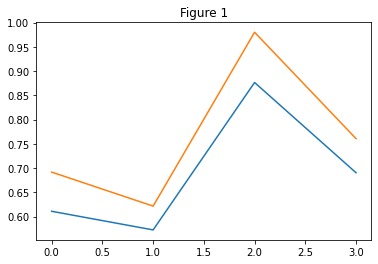

In [46]:
print(Accuracy_List)
print(Precision_List)
print(Recall_List)
print(F1_List)

Acc_av = 0
Pre_av = 0
Rec_av = 0
F1L_av = 0
for i in range(0,len(sample_sizes)):

  Acc_av = Acc_av + Accuracy_List[i]
  Pre_av = Pre_av + Precision_List[i]
  Rec_av = Rec_av + Recall_List[i]
  F1L_av = F1L_av + F1_List[i]
Average = []

Average.append(Acc_av/len(sample_sizes))
Average.append(Pre_av/len(sample_sizes))
Average.append(Rec_av/len(sample_sizes))
Average.append(F1L_av/len(sample_sizes))
print(Average)
print(Bayes_Results)
names = ['Average,Bayes','Results']
pos = [0,1,2,3]
plt.plot(pos,Average,Bayes_Results,label = names[0])
plt.title('Figure 1')
plt.show()

This data in figure one shows the two results, naive bayes as the yellow and the averages of the word list classifier in the blue. This then can be inturpretted to understand what it means at each point in comparison to the other. 

The data shown depicts on the base case of the naive bayes, it is higher in every catagory than the average of wordlist for the sample size chosen.

5
0.6416666666666667
5
0.5986078886310905
8
0.9566666666666667
10
0.7240506329113924


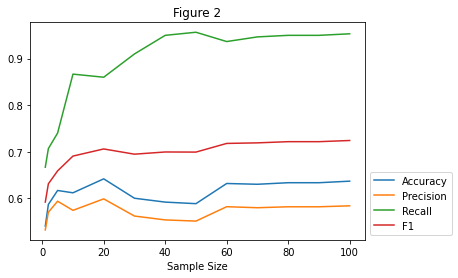

In [47]:

names = ['Accuracy','Precision','Recall','F1']

grid=[sample_sizes]
graphs=[
        Accuracy_List,Precision_List,Recall_List,F1_List
        ]

for i in graphs:
  Biggest = 0
  num = 1
  for j in i:
    if j > Biggest:
      Biggest = j
      num = num + 1
  print(num)
  print(Biggest)

for o,graph in enumerate(graphs):
    plt.plot(sample_sizes,graph,label = str(names[o]))

plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.xlabel('Sample Size')
plt.title('Figure 2')
plt.show()


5) a) 

For the experiment, I have changed the values of the sample size by incremented values, this in turn increased the wordlist and the amount of word checks that are done. This means that for each review, the information inside is more valuable and words that had no impact now do. This increases all values to a certain point, however then fat gets in the way. words that shouldn't have much or any influence now do impact it and if a review repeated one word several times that had little influence on the actual meaning of the review, it could cause it to be classified differently.
 
I decided to just run the accuracy tester the same number of values in the sample size, this means I can increase and change the sample size variation and that can be represented in the graph and the data I create.
 
As seen in Figure 2, there is a general increase in all 4 areas, this is too a point however, and some strange anomalies can be seen in the data. For example, there is a spike in the value of recall, Accuracy and precision. However this is smoothed in the value of F1. There is a large dip in the data across all categories at point 20 to point 60, except the recall. This means that the data in this section has a lower precision, showing that it might find in this set more positives, though more of them are wrongly detected. The recall on the other hand is finding more of the correct positives rather though it is potentially identifying more negatives as positive. This shows that in the data set provided, and between teh word lists lengths of 20-60, more of the positive words appear in the reviews generally compared to the negative words. This represents potentially that there are less words to express that a review is good compared to negative words.
 
In my opinion one of the best pieces of information can be seen in the value of F1 in Figure 2. This is because it shows, to an extent, what I predicted the data to appear as. A general increase in the abilities of my classifier as the word list increased in size. This general increase is interrupted by the dip I identified above, which in general seems to show that more of the classifications were wrong and more than usual were being assigned positive values. This is good information, as it can mean several things; there are more ways to represent a bad review in the words used, or it could mean that more common words that appear in all reviews are in this section of the positive word list frequency, meaning more are falsely identified as positive.


5) b)

As a result of the data I have accumulated, I would recommend the naive bayes classifier. This is because no matter the data set size i put in, with the current configuration of it the values of my classifier are even at their highest worse than that of the naive bayes in every field. In the graph labelled figure 1, the data shows bayes results in yellow, and my average results for all the variations in blue. This is offset by a similar amount, meaning roughly they perform the same, however totally it is worse on every point. Even at its best result, as seen above Figure 2, the results are still less than that of the bayes version.
 
Therefore, I would recommend the bayes classifier. If the one I created had different bands of classification, adding different score values it might do better, however for the version I have made it is worse in every aspect. 
 
As well as this lower quality of a result, there is also a further problem. The runtime of the classifier is already very large and as the data set increases it increases as well. This may not seem like a large issue, however if you wanted to train and execute the data upon a much larger data set than the one we have been provided the runtime could become many times worse than it already is, for a worse result. Whereas the naive bayes algorithm takes into account the best words and still can execute in a decent time.

Changes have been made to the code in order to reduce the run time, and more could be made to increase its efficently. However because of the way that it is meant to work, with iteration over each word in each review in an entire data set, the performance becomes drastically worse as the data set increases. This doesnt mean the naive bayes doesnt, however at least with my configuration it worse quicker than the naive bayes. This could be another interesting data set, to experiment upon the running time of a fixed sized data set and increased word list length or increased data sets compared with accuracy.

Seen just above figure two is a set of 4 data samples, this is the highest that each catagory could achieve and the position in the data sample that it takes it from. Even using this information, of the best my classifier could do dependant on wordlist size, it still could not pass the naive bayes classifier in a single catagory demonstrating well that the naive bayes is better. 




In [52]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437

from google.colab import drive
drive.mount('/content/drive')
import io
from nbformat import current

filepath="/content/drive/My Drive/NLENotebooks/assessment/NLassignment2022_232560.ipynb"
#filepath="NLassignment2022.ipynb"
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Submission length is 2314
